In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [3]:
df = pd.read_csv('cdata.csv')

In [75]:
df.head()

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


In [126]:
def Distance(x1, y1, x2, y2):
    return math.sqrt(math.pow((x1-x2), 2) + math.pow((y1-y2), 2) )

def Kmeans(center, cluster_pred, point):
    k = len(center)
    # the number of points
    point_idx = 0
    # how many points change it's cluster
    num_change = 0
    for _point in point:
        min_d = 99999
        center_idx = 0
        old_cluster = cluster_pred[point_idx]
        # find out which center the point belongs to
        for _center in center:
            d = Distance(_center[0], _center[1], _point[0], _point[1])
            if d<min_d:
                min_d = d
                cluster_pred[point_idx] = center_idx
            center_idx+=1
        # if the point's cluster has changed
        if cluster_pred[point_idx]!=old_cluster:
            num_change+=1        
        point_idx +=1
        
    # recalculate the centers
    for center_idx in range(k):
        num_c = 0
        x_sum = 0
        y_sum = 0
        for n in range(len(point)):
            if cluster_pred[n]==center_idx:
                x_sum+=point[n][0]
                y_sum+=point[n][1]
                num_c+=1
        if num_c==0:
            num_c = 1
        center[center_idx] = (float(x_sum)/num_c, float(y_sum)/num_c)
       
    return center, cluster_pred, num_change
        
    

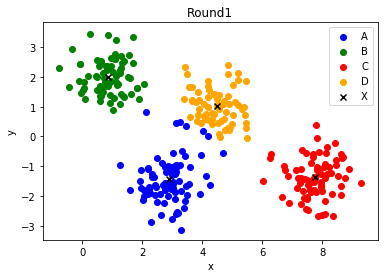

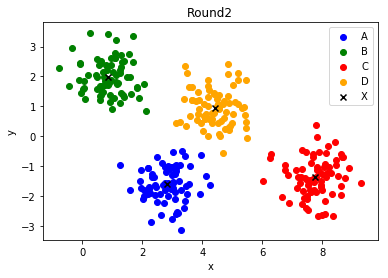

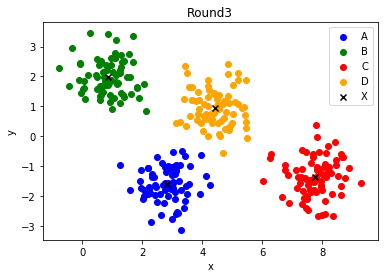

In [129]:
# initialization
k = 4
colors = ['b','g','r','orange']
center = []
for i in range(k):
    while(True):
        judge = True
        idx = random.randint(0, 300)
        for _cen in center:
            if Distance(_cen[0], _cen[1], point[idx][0], point[idx][1])<3:
                judge = False
        if judge==True:
            center.append((df.at[idx, 'x'], df.at[idx, 'y']))
            break
        
    
cluster_pred = [0]*300
point = []
for i in range(300):
    point.append((df.at[i, 'x'], df.at[i, 'y']))
    
# redo until converge
while_cnt = 0
while(True):
    while_cnt+=1
    center, cluster_pred, num_change = Kmeans(center, cluster_pred, point)
    
    plt.figure()
    plt.xlabel('x')
    plt.ylabel('y')
    
    group1x = []
    group2x = []
    group3x = []
    group4x = []
    group1y = []
    group2y = []
    group3y = []
    group4y = []
    centerx = []
    centery = []
    for i in range(300):
        if cluster_pred[i]==0:
            group1x.append(point[i][0])
            group1y.append(point[i][1])
        elif cluster_pred[i]==1:
            group2x.append(point[i][0])
            group2y.append(point[i][1])
        elif cluster_pred[i]==2:
            group3x.append(point[i][0])
            group3y.append(point[i][1])
        else:
            group4x.append(point[i][0])
            group4y.append(point[i][1])
    for i in range(k):
        centerx.append(center[i][0])
        centery.append(center[i][1])
            
    plt.scatter(group1x, group1y, c=colors[0], label= 'group1')
    plt.scatter(group2x, group2y, c=colors[1], label= 'group2')
    plt.scatter(group3x, group3y, c=colors[2], label= 'group3')
    plt.scatter(group4x, group4y, c=colors[3], label= 'group4')
    plt.scatter(centerx, centery, c='black', label= 'center', marker = 'x')
    
    plt.legend("ABCDX")
    plt.title('Round'+str(while_cnt))
    
    # whether it has converged
    if num_change<5:
        break



plt.show()


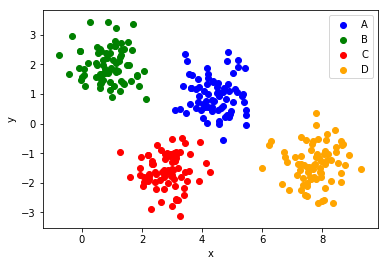

In [43]:
def SSE(center, cluster_pred, points):
    